https://medium.com/towards-data-science/make-a-nested-bar-chart-with-seaborn-9a9988e30dca

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up a color palette of grass greens and pigskin browns:
BACKGROUND_COLOR = '#B5CB99'
TEXT_COLOR = '#FCE09B'
BAR_COLOR = '#B2533E'
LEGEND_COLOR = '#186F65'


# Create a dictionary of display parameters favorable for nested bars:
sns.set(style='white', rc={
    'axes.facecolor': BACKGROUND_COLOR,
    'figure.facecolor': BACKGROUND_COLOR,
    'text.color': TEXT_COLOR,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.right': False,
    'axes.spines.top': False
})

In [10]:
# Load AP Top 25 College poll data:
df = pd.read_csv('https://bit.ly/45yEPtI')
df.head(3)

,Year,Week,Poll,Rank,Team,Conference
0,2002,18,Final,1,Ohio State,Big Ten
1,2002,18,Final,2,Miami (FL),Big East
2,2002,18,Final,3,Georgia,SEC (East)


In [11]:
# Initialize a list to store the intersection results:
top_25 = []

# Get unique years from the DataFrame:
unique_years = df['Year'].unique()

# Loop through each year and find the intersection of Final and Preseason Teams:
for year in unique_years:
    year_data = df[df['Year'] == year]
    
    # Make sets of the final and preseason teams:
    final_teams = set(year_data[year_data['Poll'] == 'Final']['Team'])
    preseason_teams = set(year_data[year_data['Poll'] == 'Preseason']['Team'])
    
    # Find the set intersections for each year and append to the top_25 list:
    intersection = final_teams.intersection(preseason_teams)
    num_right = len(intersection)    
    top_25.append({'Year': year, 'Finishers': num_right})

# Create a new DataFrame from the list:
df_25 = pd.DataFrame(top_25)

# Add columns for the number of ranked teams and percent predicted correctly:
df_25['Top 25'] = 25
df_25['Pct Right'] = df_25['Finishers'] / df_25['Top 25']
df_25['Pct Right'] = df_25['Pct Right'].apply(lambda x: f'{x:.0%}')

print(df_25)

    Year  Finishers  Top 25 Pct Right
0   2002         14      25       56%
1   2003         14      25       56%
2   2004         16      25       64%
3   2005         15      25       60%
4   2006         17      25       68%
5   2007         14      25       56%
6   2008         14      25       56%
7   2009         17      25       68%
8   2010         13      25       52%
9   2011         18      25       72%
10  2012         17      25       68%
11  2013         16      25       64%
12  2014         16      25       64%
13  2015         15      25       60%
14  2016         14      25       56%
15  2017         16      25       64%
16  2018         14      25       56%
17  2019         17      25       68%
18  2020         15      25       60%
19  2021         11      25       44%
20  2022         10      25       40%


In [12]:
def add_bars(ax_obj, x, y, width, alpha, label):
    """Plot a seaborn horizontal bar chart (credit Oscar Leo)."""
    sns.barplot(ax=ax_obj, x=x, y=y, 
                label=label,
                width=width, 
                alpha=alpha,
                color=BAR_COLOR,
                edgecolor=TEXT_COLOR,
                orient="h")

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


TypeError: barh() got multiple values for argument 'width'

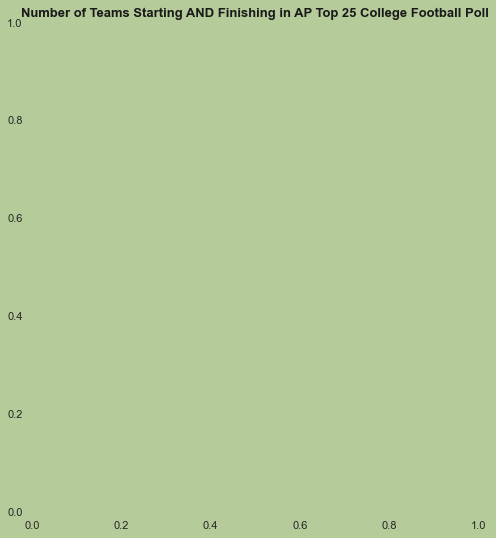

In [13]:
# Make the display, calling add_bars() twice to nest the bars:
fig, ax = plt.subplots(figsize=(8, 9))
ax.set_title('Number of Teams Starting AND Finishing in \
AP Top 25 College Football Poll', color='k', fontsize=13, weight='bold')

# Plot bars for total number of teams (secondary measure):
add_bars(ax_obj=ax, 
         x=df_25['Top 25'],
         y=df_25['Year'],
         width=0.55, 
         alpha=0.6, 
         label='Teams in Preseason Poll')

# Plot bars for teams that started AND finished in the Top 25 (primary measure):
add_bars(ax_obj=ax, 
         x=df_25['Finishers'],
         y=df_25['Year'],
         width=0.7, 
         alpha=1, 
         label='Teams in Preseason AND Final Polls')

# Add informative text stating percent correct:
ax.bar_label(ax.containers[1], 
             labels=df_25['Pct Right'] + ' correct', 
             padding=-70)

# Assign a custom x-axis label and legend:
ax.set_xlabel('Number of Teams') 
ax.legend(bbox_to_anchor=(1.0, -0.085), facecolor=LEGEND_COLOR);

In [ ]:
# Filter the original DataFrame to teams ranked 4 or better:
df_4 = df[(df['Rank'] <= 4)].copy()

# Initialize a list to store the intersection results:
top_4 = []

# Loop through each year and find the intersection of Final and Preseason Teams:
for year in unique_years:
    year_data = df_4[df_4['Year'] == year]
    
    # Make sets of the final and preseason teams:
    final_teams = set(year_data[year_data['Poll'] == 'Final']['Team'])
    preseason_teams = set(year_data[year_data['Poll'] == 'Preseason']['Team'])
    
    # Find the set intersections for each year and append to the top_4 list:
    intersection = final_teams.intersection(preseason_teams)
    num_right = len(intersection)    
    top_4.append({'Year': year, 'Finishers': num_right})

# Create a new DataFrame from the list:
df_final_4 = pd.DataFrame(top_4)

# Add columns for the number of ranked teams and percent predicted correctly:
df_final_4['Top 4'] = 4
df_final_4['Pct Right'] = (df_final_4['Finishers'] / df_final_4['Top 4'])
df_final_4['Pct Right'] = df_final_4['Pct Right'].apply('{:.0%}'.format)

print(df_final_4)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.set_title('Number of Teams Starting AND Finishing in \
Top 4 of AP College Football Poll', color='k', fontsize=14, weight='bold')

add_bars(ax_obj=ax, 
         x=df_final_4['Top 4'],
         y=df_final_4['Year'],
         width=0.55, 
         alpha=0.6, 
         label='Top 4')

add_bars(ax_obj=ax, 
         x=df_final_4['Finishers'],
         y=df_final_4['Year'],
         width=0.7, 
         alpha=1, 
         label='Finishers')

ax.bar_label(ax.containers[1], 
             labels=df_final_4['Pct Right'] + ' correct', 
             padding=3)

ax.set_xticks(range(5))
ax.set_xlabel('Number of Correct Final Four Predictions', 
              fontdict={'size': 16});